accuracy is : 97.77777777777777
Confusion matrix, without normalization
[[14  0  0]
 [ 1 15  0]
 [ 0  0 15]]


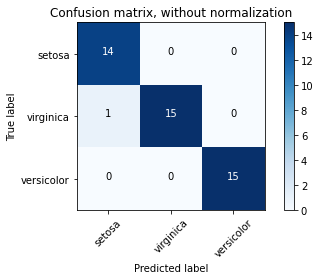

In [1]:
import numpy as np
from csv import reader
from random import seed
from random import randrange
from math import sqrt
from math import exp
from math import pi
import random 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats
import requests





# function for plot confusion matrix with actual_l and predicted_l calculated by me
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    
    














# Load a CSV Iris data
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

# Convert string column to float(for make it possible work with data and labels)
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Convert string column to integer(for make it possible work with data and labels)
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

random.seed(datetime.now())
filename = 'iris.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)

#Used for 70% training_test and 30% Testing_test
dataset0=[]
dataset1=[]
dataset2=[]
training_test0=[]
testing_test0=[]


for rows in dataset:
    if rows[4]==2:
        dataset2.append(rows)
    elif rows[4]==1:
        dataset1.append(rows)
    else:
        dataset0.append(rows)
        
random.shuffle(dataset0)
random.shuffle(dataset1)
random.shuffle(dataset2)

training_test0=dataset0[:35]+dataset1[:35]+dataset2[:35]
testing_test0=dataset0[35:]+dataset1[35:]+dataset2[35:]



#Convert data set to arrays for using in mean and Cov 
X = np.array([ x[0:4] for x in training_test0 if len(x)==5 ], dtype='float64')
X.shape

#print(X)




mu0 = np.mean(X[0:35,:],axis=0)
mu1 = np.mean(X[35:70,:],axis=0)
mu2 = np.mean(X[70:105,:],axis=0)


Sig0 = np.cov(X[0:35,:],rowvar=False)
Sig1 = np.cov(X[35:70,:],rowvar=False)
Sig2 = np.cov(X[70:105,:],rowvar=False)
##delete # for make the Cov matrix to diagonal matrix 
#for i in range(len(Sig0)):
#    for j in range(len(Sig0[i])):
#        if i != j:
#            Sig0[i][j] = 0            

#for i in range(len(Sig1)):
#    for j in range(len(Sig0[i])):
#        if i != j:
#            Sig1[i][j] = 0


#for i in range(len(Sig0)):
#    for j in range(len(Sig2[i])):
#        if i != j:
#            Sig2[i][j] = 0

##it is clear , it is our function to calculate probability
def BayesClassifier(test_point,mean,variance):
    mean = np.array([mean])
    X = test_point-mean
    p1 = ((1/(2*pi)**0.5)/(np.linalg.det(variance)))**0.5
    p2 = np.exp(-0.5*np.matmul(np.matmul(X,np.linalg.inv(variance)),np.transpose(X)))
    P = (1/3)*p1*p2     # 1/3 is the prior probability
    return(P)



    
##finding max probability of each class for testing data and save them into predicted_l and actual_l for calculating accuracy
##and make confusion matrix
test_set1=list()    
row_copy=list() 
predicted_l=list()
for row in testing_test0:
    row_copy=list(row)
    test_set1.append(row_copy)
    row_copy[-1]=None
for row in test_set1:
    # virginica flower type probability calculation call
    prob_virginica = BayesClassifier(row[0:4],mu1,Sig1)
    
    # setosa flower type probability calculation call
    prob_setosa = BayesClassifier(row[0:4],mu0,Sig0)
    
    # versicolor flower type probability calculation call
    prob_versicolor = BayesClassifier(row[0:4],mu2,Sig2)
    
    if(max(prob_virginica,prob_setosa,prob_versicolor)==prob_virginica):
        predicted_l.append(1)
    elif(max(prob_virginica,prob_setosa,prob_versicolor)==prob_setosa):
        predicted_l.append(0)
    elif(max(prob_virginica,prob_setosa,prob_versicolor)==prob_versicolor):
        predicted_l.append(2)
        
    
   
        
        
        
        
        
        
        
t=BayesClassifier([5,2,5,2],mu0,Sig0)


actual_l = [row[-1] for row in testing_test0]


def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

score=accuracy_metric(actual_l,predicted_l)
print("accuracy is :",score)


y_predicted=pd.Series(predicted_l,name="predicted")
y_actual=pd.Series(actual_l,name="actual")
df_confusion=pd.crosstab(y_predicted,y_actual)

a=df_confusion.to_numpy()
cnf_matrix = a
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['setosa', 'virginica', 'versicolor'],
                      title='Confusion matrix, without normalization')


